# 3D Graphics Systems | AI Graphics - Theory and Practice | IMPA 2023
### Instructor: Luiz Velho
### TA: Hallison Paz
### Course info: https://lvelho.impa.br/i3d23/

## Lab Class #2 - A demo of some functionalities of PyTorch3D

---
#**Personal Info:**
*   **Student:**
    *   Sherlon Almeida da Silva
*   **Affiliation:**
    *   PhD Student
    *   University of São Paulo (USP)
    *   Institute of Mathematics and Computer Science (ICMC)
    *   Laboratory of Visualization, Imaging and Computer Graphics (VICG)
*   **Research & Programming:**
    *   [Lattes](http://lattes.cnpq.br/0000096258045504) | [ORCID](https://orcid.org/0000-0001-6124-9350) | [Google Scholar](https://scholar.google.com.br/citations?user=boFxo4gAAAAJ&hl=pt-BR) | [Linkedin](https://www.linkedin.com/in/SherlonAlmeida/) | [Github](https://github.com/SherlonAlmeida) | [Personal Page](http://vicg.icmc.usp.br/vicg/person/72/sherlon-almeida-da-silva)
---

In [1]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith(("1.13.", "2.0.")) and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

## Data Structures

In [2]:
from pytorch3d.structures import Meshes

In [3]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

In [4]:
!wget -P . https://raw.githubusercontent.com/hallpaz/3dsystems20/master/extensions_utils/cube.py

--2023-06-27 18:09:48--  https://raw.githubusercontent.com/hallpaz/3dsystems20/master/extensions_utils/cube.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1630 (1.6K) [text/plain]
Saving to: ‘./cube.py.2’

cube.py.2           100%[===================>]   1.59K  --.-KB/s    in 0s      

2023-06-27 18:09:48 (31.9 MB/s) - ‘./cube.py.2’ saved [1630/1630]



In [5]:
# Vertex coordinates for a level 0 cube.
_cube_verts0 = [
    [-0.50, 0.50, 0.50],
    [-0.50, -0.50, 0.50],
    [0.50, -0.50, 0.50],
    [0.50, 0.50, 0.50],

    [-0.50, 0.50, -0.50],
    [-0.50, -0.50, -0.50],
    [0.50, -0.50, -0.50],
    [0.50, 0.50, -0.50]
]


# Faces for level 0 cube
_cube_faces0 = [
    [0, 1, 2],
    [2, 3, 0],
    [7, 6, 5],
    [4, 7, 5],
    [6, 3, 2],
    [3, 6, 7],
    [4, 5, 0],
    [0, 5, 1],
    [3, 4, 0],
    [4, 3, 7],
    [2, 1, 5],
    [5, 6, 2],
]

In [6]:
from cube import cube

In [7]:
refinedcube = cube(1, device=device)

In [8]:
# creates a batch
verts_list = [torch.tensor(_cube_verts0, device=device), refinedcube.verts_list()[0]]
faces_list = [torch.tensor(_cube_faces0, dtype=torch.int64, device=device), refinedcube.faces_list()[0]]

mesh_batch = Meshes(verts=verts_list, faces=faces_list)

## Packed and Padded Tensors

In [9]:
# packed representation
verts_packed = mesh_batch.verts_packed()

# auxiliary tensors
mesh_to_vert_idx = mesh_batch.mesh_to_verts_packed_first_idx()
vert_to_mesh_idx = mesh_batch.verts_packed_to_mesh_idx()

# edges
edges = mesh_batch.edges_packed()

# face normals
face_normals = mesh_batch.faces_normals_packed()

In [10]:
verts_packed

tensor([[-0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000],
        [ 0.5000, -0.5000,  0.5000],
        [ 0.5000,  0.5000,  0.5000],
        [-0.5000,  0.5000, -0.5000],
        [-0.5000, -0.5000, -0.5000],
        [ 0.5000, -0.5000, -0.5000],
        [ 0.5000,  0.5000, -0.5000],
        [-0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000],
        [ 0.5000, -0.5000,  0.5000],
        [ 0.5000,  0.5000,  0.5000],
        [-0.5000,  0.5000, -0.5000],
        [-0.5000, -0.5000, -0.5000],
        [ 0.5000, -0.5000, -0.5000],
        [ 0.5000,  0.5000, -0.5000],
        [-0.5000,  0.0000,  0.5000],
        [ 0.0000,  0.0000,  0.5000],
        [ 0.0000,  0.5000,  0.5000],
        [-0.5000,  0.5000,  0.0000],
        [-0.5000,  0.0000,  0.0000],
        [ 0.0000, -0.5000,  0.5000],
        [-0.5000, -0.5000,  0.0000],
        [ 0.5000,  0.0000,  0.5000],
        [ 0.0000, -0.5000,  0.0000],
        [ 0.5000, -0.5000,  0.0000],
        [ 0.0000,  0.5000,  0.0000],
 

In [11]:
mesh_batch.verts_padded()

tensor([[[-0.5000,  0.5000,  0.5000],
         [-0.5000, -0.5000,  0.5000],
         [ 0.5000, -0.5000,  0.5000],
         [ 0.5000,  0.5000,  0.5000],
         [-0.5000,  0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000],
         [ 0.5000, -0.5000, -0.5000],
         [ 0.5000,  0.5000, -0.5000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[

## Input / Output

In [12]:
!mkdir -p data
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow_texture.png

--2023-06-27 18:09:51--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.141.108, 13.249.141.13, 13.249.141.40, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.141.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330659 (323K) [text/plain]
Saving to: ‘data/cow.obj.2’

cow.obj.2           100%[===================>] 322.91K  --.-KB/s    in 0.03s   

2023-06-27 18:09:51 (9.34 MB/s) - ‘data/cow.obj.2’ saved [330659/330659]

--2023-06-27 18:09:51--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.141.108, 13.249.141.13, 13.249.141.40, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.141.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155 [text/plain]
Saving to: ‘data/cow.mtl.2’

cow.mtl.2           100%[==================

In [13]:
from pytorch3d.io import load_obj

In [14]:
obj_file = "data/cow.obj"
verts, faces, aux = load_obj(obj_file)

faces = faces.verts_idx
normals = aux.normals
textures = aux.verts_uvs
materials = aux.material_colors
tex_maps = aux.texture_images

In [15]:
tex_maps

{'material_1': tensor([[[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         ...,
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020]

In [16]:
import matplotlib.pyplot as plt
from pytorch3d.renderer import Textures

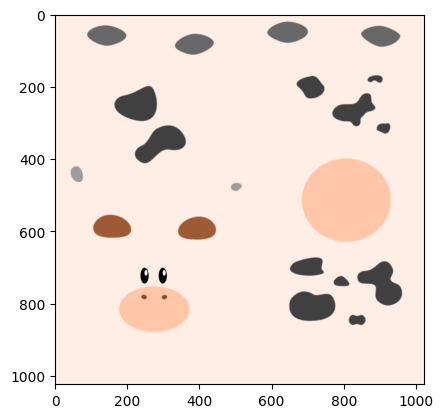

In [17]:
plt.imshow(tex_maps['material_1'])

# 3D Transforms

In [18]:
from pytorch3d.transforms import Transform3d, Rotate, Translate

In [19]:
# example 1
T = Translate(torch.FloatTensor([[1.0, 2.0, 3.0]]), device=device)
R = Rotate(torch.FloatTensor([[0, 1, 0], [0, 0, 1], [1, 0, 0]]), device=device)
RT = Transform3d(device=device).compose(R, T)

In [20]:
RT.get_matrix()

tensor([[[0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [1., 2., 3., 1.]]], device='cuda:0')

In [21]:
# applying Transform
verts_transformed = RT.transform_points(mesh_batch.verts_packed())
verts_transformed

tensor([[1.5000, 1.5000, 3.5000],
        [1.5000, 1.5000, 2.5000],
        [1.5000, 2.5000, 2.5000],
        [1.5000, 2.5000, 3.5000],
        [0.5000, 1.5000, 3.5000],
        [0.5000, 1.5000, 2.5000],
        [0.5000, 2.5000, 2.5000],
        [0.5000, 2.5000, 3.5000],
        [1.5000, 1.5000, 3.5000],
        [1.5000, 1.5000, 2.5000],
        [1.5000, 2.5000, 2.5000],
        [1.5000, 2.5000, 3.5000],
        [0.5000, 1.5000, 3.5000],
        [0.5000, 1.5000, 2.5000],
        [0.5000, 2.5000, 2.5000],
        [0.5000, 2.5000, 3.5000],
        [1.5000, 1.5000, 3.0000],
        [1.5000, 2.0000, 3.0000],
        [1.5000, 2.0000, 3.5000],
        [1.0000, 1.5000, 3.5000],
        [1.0000, 1.5000, 3.0000],
        [1.5000, 2.0000, 2.5000],
        [1.0000, 1.5000, 2.5000],
        [1.5000, 2.5000, 3.0000],
        [1.0000, 2.0000, 2.5000],
        [1.0000, 2.5000, 2.5000],
        [1.0000, 2.0000, 3.5000],
        [1.0000, 2.5000, 3.0000],
        [1.0000, 2.5000, 3.5000],
        [0.500

# Renderer

In [22]:
def plot_side_by_side(images):
  n = images.shape[0]
  fig = plt.figure(figsize=(10, 10))
  for i in range(n):
    fig.add_subplot(1, n, i+1)
    plt.imshow(images[i, ..., :3].cpu().numpy())
    plt.title(f"Cube {i+1}")
    # plt.grid("off");
    # plt.axis("off");

In [23]:
from pytorch3d.renderer import (
    OpenGLPerspectiveCameras, look_at_view_transform,
    RasterizationSettings, BlendParams,
    MeshRenderer, MeshRasterizer, HardPhongShader,
    Textures, PointLights
)

In [24]:
R, T = look_at_view_transform(2.7, 10, 20)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1, # sets the value of K
)

renderer = MeshRenderer(
    rasterizer=MeshRasterizer(cameras=cameras, raster_settings=raster_settings),
    shader=HardPhongShader(device=device, cameras=cameras)
)

In [25]:
# Creating a texture for the mesh
white_tex = torch.ones_like(mesh_batch.verts_padded())
textures = Textures(verts_rgb=white_tex.to(device))
mesh_batch.textures = textures

In [26]:
images = renderer(mesh_batch, cameras=cameras)

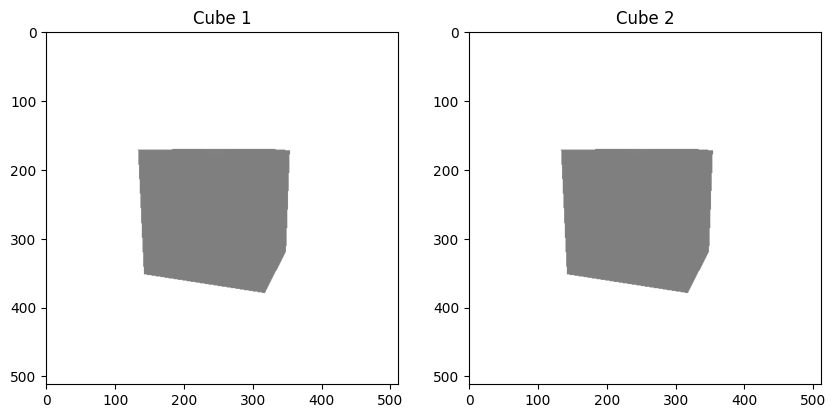

In [27]:
plot_side_by_side(images)

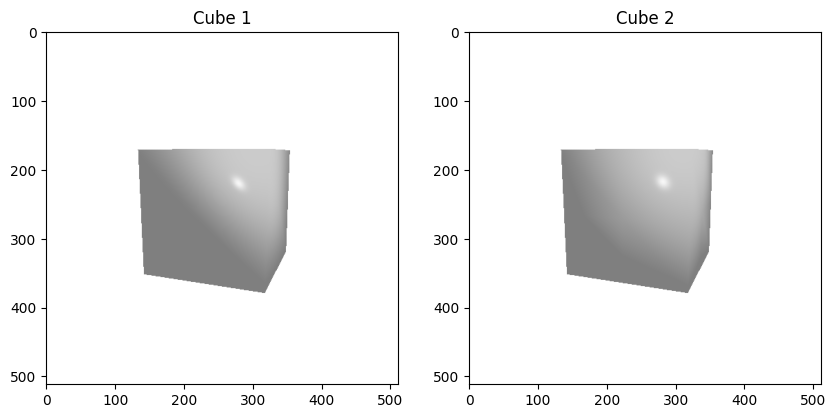

In [28]:
#Adicionando uma fonte de luz na cena
lights = PointLights(device=device, location=[[6.0, 7.0, 4.0]])
images = renderer(mesh_batch, cameras=cameras, lights=lights)
plot_side_by_side(images)

In [29]:
from math import radians, cos, sin

In [30]:
cos45 = cos(radians(45))
sin45 = sin(radians(45))
# applying a transform to the first mesh
SR = Transform3d(device=device).scale(1.0, 1.5, 1.0).rotate(
      R=torch.tensor([[cos45, -sin45, 0.0],
                      [sin45, cos45, 0.0],
                      [0.0, 0.0, 1.0]])
    )
verts0 = mesh_batch.verts_list()[0]
verts0 = SR.transform_points(verts0)
verts1 = mesh_batch.verts_list()[1]
mesh_batch2 = Meshes(verts=[verts0, verts1], faces=mesh_batch.faces_list(), textures=mesh_batch.textures)

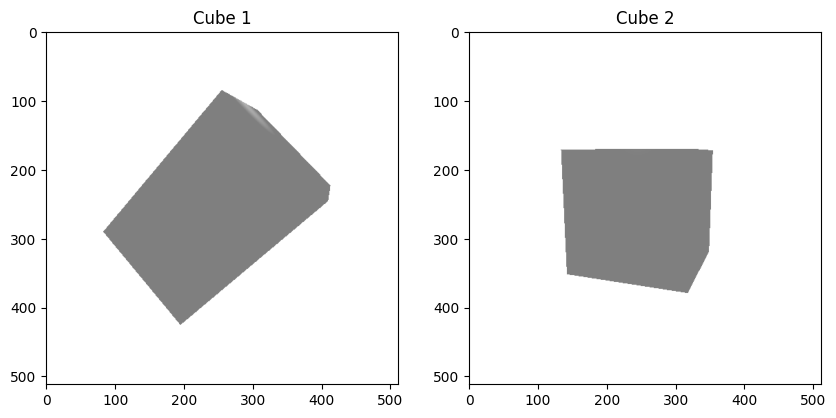

In [31]:
plot_side_by_side(renderer(mesh_batch2))

## Challenge

###1. Change the texture of the mesh_batch so that each of the cubes is colored differently.

In [32]:
import numpy as np
from PIL import Image

In [33]:
# Creating a texture for the mesh
red_texture = torch.ones_like(mesh_batch.verts_padded())

# Set the RGB values to red (1.0, 0.0, 0.0)
red_texture[:, :, 0], red_texture[:, :, 1], red_texture[:, :, 2] = 1.0, 0.0, 0.0

In [34]:
# Creating a texture for the mesh
blue_texture = torch.ones_like(mesh_batch.verts_padded())

# Set the RGB values to blue (0.0, 0.0, 1.0)
blue_texture[:, :, 0], blue_texture[:, :, 1], blue_texture[:, :, 2] = 0.0, 0.0, 1.0

In [35]:
R, T = look_at_view_transform(2.7, 10, 20)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1, # sets the value of K
)

renderer = MeshRenderer(
    rasterizer=MeshRasterizer(cameras=cameras, raster_settings=raster_settings),
    shader=HardPhongShader(device=device, cameras=cameras)
)

### Blue

In [36]:
# Applying texture
textures = Textures(verts_rgb=blue_texture.to(device))
mesh_batch.textures = textures

In [37]:
images = renderer(mesh_batch, cameras=cameras)

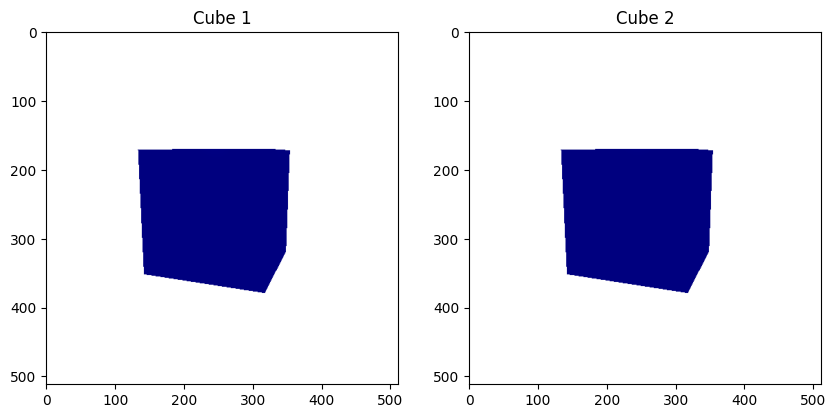

In [38]:
plot_side_by_side(images)

###Red

In [39]:
# Applying texture
textures = Textures(verts_rgb=red_texture.to(device))
mesh_batch.textures = textures

In [40]:
images = renderer(mesh_batch, cameras=cameras)

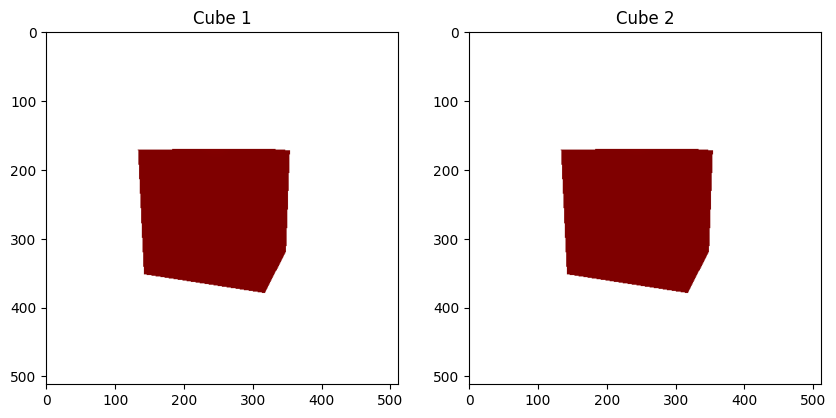

In [41]:
plot_side_by_side(images)

###2. Experiment different transforms and compositions in terms of rotation, translation and scaling.

In [42]:
#Realiza uma rotação em torno do eixo X e modifica a escala no mesmo eixo
def transformationX(angle=0, new_scale=0, translation=0):
  cos_ = cos(radians(angle))
  sin_ = sin(radians(angle))
  SR = Transform3d(device=device).scale(new_scale, 1, 1).translate(translation, 0, 0).rotate(
           R=torch.tensor([[1.0, 0.0,  0.0],
                           [0.0, cos_, -sin_],
                           [0.0, sin_,  cos_]]
           )
       )
  return SR

#Realiza uma rotação em torno do eixo Y e modifica a escala no mesmo eixo
def transformationY(angle=0, new_scale=0, translation=0):
  cos_ = cos(radians(angle))
  sin_ = sin(radians(angle))
  SR = Transform3d(device=device).scale(1, new_scale, 1).translate(0, translation, 0).rotate(
           R=torch.tensor([[ cos_,  0.0, sin_],
                           [ 0.0,  1.0, 0.0],
                           [-sin_,  0.0, cos_]]
           )
       )
  return SR

#Realiza uma rotação em torno do eixo Z e modifica a escala no mesmo eixo
def transformationZ(angle=0, new_scale=0, translation=0):
  cos_ = cos(radians(angle))
  sin_ = sin(radians(angle))
  SR = Transform3d(device=device).scale(1, 1, new_scale).translate(0, 0, translation).rotate(
           R=torch.tensor([[cos_, -sin_, 0.0],
                           [sin_,  cos_, 0.0],
                           [0.0,  0.0, 1.0]]
           )
       )
  return SR

In [43]:
#Obtem os objetos com as transformações
SRx = transformationX(angle=30, new_scale = 1.9, translation = 1.0)
SRy = transformationY(angle=60, new_scale = 3.7, translation = 0.0)
SRz = transformationZ(angle=15, new_scale = 0.6, translation = 0.0)

In [44]:
#Define o objeto 0 e aplica transformações
verts0 = mesh_batch.verts_list()[0]
verts0 = SRx.transform_points(verts0) #Transforma em X
verts0 = SRz.transform_points(verts0) #Transforma em Z

In [45]:
verts1 = mesh_batch.verts_list()[1]
verts1 = SRy.transform_points(verts1) #Transforma em Y
verts1 = SRz.transform_points(verts1) #Transforma em Z

In [46]:
#Cria um novo batch com os objetos transformados
mesh_batch2 = Meshes(verts=[verts0, verts1], faces=mesh_batch.faces_list(), textures=mesh_batch.textures)

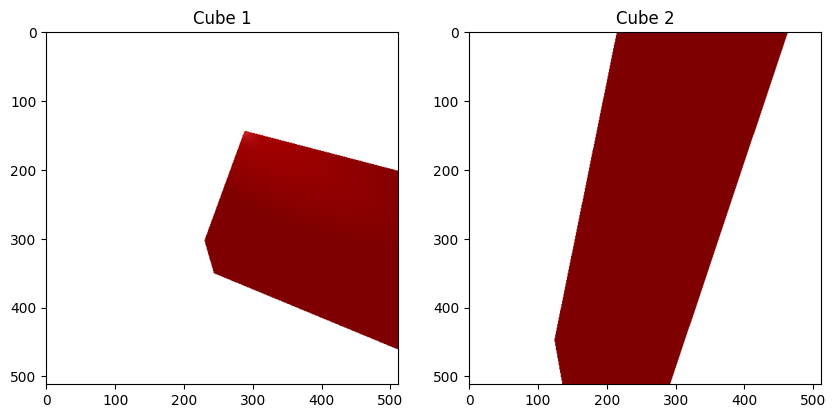

In [47]:
plot_side_by_side(renderer(mesh_batch2))

## Implicit Modeling and *cubify*

In [48]:
from pytorch3d.ops import cubify
from pytorch3d.io import IO

In [49]:
x_axis = [-1, 1]
y_axis = [-1, 1]
z_axis = [-1, 1]
depth = 64
height = 64
width = 64

volume = torch.zeros([depth, height, width])

In [50]:
# some examples of surfaces defined implicitly
sphere = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - 0.8**2
torus = lambda x: (0.6 - torch.sqrt(x[0]**2 + x[1]**2))**2 + x[2]**2 - 0.3**2

In [51]:
function = sphere
for d in range(depth):
  for h in range(height):
    for w in range(width):
      x = (d - depth/2) / (depth/2)
      y = (h - height/2) / (height/2)
      z = (w - width/2) / (width/2)
      point = torch.tensor([x, y, z])
      #Se parte do objeto definido pela função implícita passa por dentro do cubo atual, define ele como 1.0, gerando um objeto oco.
      if function(point) <= 0:
        volume[d, h, w] = 1.0 #Função de ocupação

In [52]:
cubified = cubify(volume.unsqueeze(0), 0.7)

In [53]:
IO().save_mesh(cubified, "cubified_mesh.obj")

## Challenge

###3. Can you substitute the ````for```` loops for vectorized operations using Numpy or PyTorch functions?

In [54]:
#Create coordinate grids
grid_d = torch.linspace(-1, 1, depth)
grid_h = torch.linspace(-1, 1, height)
grid_w = torch.linspace(-1, 1, width)

In [55]:
x, y, z = torch.meshgrid(grid_d, grid_h, grid_w)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [56]:
#Stack coordinate tensors
points = torch.stack([x, y, z], dim=-1)

In [57]:
#Converting to 1D
points = torch.reshape(points, (depth*height*width, 3))

In [58]:
def sphere(p):
    return (p ** 2).sum(dim=-1) - 0.8**2

In [59]:
#Replacing the positions occupied
output = torch.where(sphere(points) <= 0, torch.tensor(1.0), torch.tensor(0.0))

In [60]:
#Converting to 3D again
new_volume = torch.reshape(output, [depth, height, width])

In [61]:
#Obtaining a volumetric mesh, composed by cubes
#Ou seja, Gera uma malha 3D formada por cubos, a partir de uma função de ocupação de um objeto volumétrico
new_cubified = cubify(new_volume.unsqueeze(0), 0.7) #O unsqueeze gera uma nova dimensão artificial. Neste caso, passando o zero estamos definindo uma dimensão para o batch (pytorch precisa do batch).

In [62]:
#Save output mesh
IO().save_mesh(new_cubified, "cubified_mesh_pytorch.obj")

In [63]:
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib

def show_plotly_side_by_side(mesh, title):
    # Render the plotly figure
    fig = plot_scene(
        plots= {
          title: {
              "shapenet_mesh": mesh
          }
        },
        ncols = 1
    )
    fig.show()

In [64]:
#Observando a malha cubificada
show_plotly_side_by_side(new_cubified, "Cubified Mesh")

###4. Can you make the cubified sphere look "rounded"?

In [65]:
#Obtendo o numero de vértices
new_cubified.verts_list()[0].shape

torch.Size([11954, 3])

In [66]:
#Obtendo o numero de faces
new_cubified.faces_list()[0].shape

torch.Size([23904, 3])

In [67]:
#Calculando o centro, minimo e maximo dos vértices
center = torch.mean(new_cubified.verts_list()[0], 0)
obj_min = torch.min(new_cubified.verts_list()[0])
obj_max = torch.max(new_cubified.verts_list()[0])
print(center, obj_min, obj_max)

tensor([0.0159, 0.0159, 0.0159]) tensor(-0.7778) tensor(0.8095)


In [68]:
#Reference: https://pytorch3d.readthedocs.io/en/latest/_modules/pytorch3d/ops/mesh_filtering.html

# Copyright (c) Meta Platforms, Inc. and affiliates.
# All rights reserved.
#
# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree.

import torch
from pytorch3d.ops import norm_laplacian
from pytorch3d.structures import Meshes, utils as struct_utils

# ----------------------- Taubin Smoothing ----------------------- #

def taubin_smoothing(
    meshes: Meshes, lambd: float = 0.53, mu: float = -0.53, num_iter: int = 10
) -> Meshes:
    """
    Taubin smoothing [1] is an iterative smoothing operator for meshes.
    At each iteration
        verts := (1 - λ) * verts + λ * L * verts
        verts := (1 - μ) * verts + μ * L * verts

    This function returns a new mesh with smoothed vertices.
    Args:
        meshes: Meshes input to be smoothed
        lambd, mu: float parameters for Taubin smoothing,
            lambd > 0, mu < 0
        num_iter: number of iterations to execute smoothing
    Returns:
        mesh: Smoothed input Meshes

    [1] Curve and Surface Smoothing without Shrinkage,
        Gabriel Taubin, ICCV 1997
    """
    verts = meshes.verts_packed()  # V x 3
    edges = meshes.edges_packed()  # E x 3

    for _ in range(num_iter):
        L = norm_laplacian(verts, edges)
        total_weight = torch.sparse.sum(L, dim=1).to_dense().view(-1, 1)
        verts = (1 - lambd) * verts + lambd * torch.mm(L, verts) / total_weight

        L = norm_laplacian(verts, edges)
        total_weight = torch.sparse.sum(L, dim=1).to_dense().view(-1, 1)
        verts = (1 - mu) * verts + mu * torch.mm(L, verts) / total_weight

    verts_list = struct_utils.packed_to_list(
        verts, meshes.num_verts_per_mesh().tolist()
    )
    mesh = Meshes(verts=list(verts_list), faces=meshes.faces_list())
    return mesh

In [69]:
smooth_obj = taubin_smoothing(new_cubified, lambd = 0.53, mu = -0.53, num_iter = 30)

In [70]:
#Save output mesh
IO().save_mesh(smooth_obj, "smooth_mesh_pytorch.obj")

In [71]:
#Observando a malha suavizada
show_plotly_side_by_side(smooth_obj, "Smooth Mesh")

####**Considerations:** I have considered various strategies for manipulating the vertices of the cubified objects. One approach involves manipulating the farthest vertices along the vector connecting it to the center of the sphere. However, this method would not be applicable to general objects other than a sphere, such as a torus. To address this, I looked for a pre-existing function in PyTorch and discovered the "taubin_smoothing()" method, which can be used to smooth the cubified object. If I were to propose a solution to this challenge, I would likely suggest a method based on the neighboring faces.

###5. Train a neural network to learn a occupancy function for a 3D surface. Use the ```cubify``` method to generate a mesh, and visualize it.

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define your MLPApproximator model
class MLPApproximator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPApproximator, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x.view(-1, 64, 64, 64)

In [73]:
#Points = input data
#new_volume = output data
points.shape, new_volume.shape

(torch.Size([262144, 3]), torch.Size([64, 64, 64]))

In [74]:
#Definindo o intervalo de [-1, 1] para computar a função de ocupação da esfera
input_data = points.reshape([64, 64, 64, 3])
input_data = input_data.unsqueeze(0)
input_data.shape

torch.Size([1, 64, 64, 64, 3])

In [75]:
#Definindo a função de ocupação resultante da função implicita da esfera como target a ser aproximada pela rede
target = new_volume.unsqueeze(0)
target.shape

torch.Size([1, 64, 64, 64])

In [76]:
# Set your training parameters
input_dim = 64 * 64 * 64 * 3  # Input shape: 64x64x64x3
hidden_dim = 256
output_dim = 64 * 64 * 64  # Output shape: 64x64x64
batch_size = 32
learning_rate = 0.001
num_epochs = 200

In [77]:
# Check if a GPU is available and use it, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [78]:
# Create an instance of the MLPApproximator model
model = MLPApproximator(input_dim, hidden_dim, output_dim).to(device)

# Define your loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [79]:
# Training data
train_data   = input_data.to(device)
train_labels = target.to(device)

In [80]:
# Create a DataLoader for the training data
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

In [81]:
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        inputs = inputs.view(inputs.size(0), -1).to(device)  # Flatten the inputs
        outputs = model(inputs).to(device)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    # Print average loss per epoch
    average_loss = running_loss / len(train_dataloader)
    if epoch % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}")

# Training complete
print("Finished training!")


Epoch [1/200], Loss: 0.2618
Epoch [11/200], Loss: 0.2524
Epoch [21/200], Loss: 0.2443
Epoch [31/200], Loss: 0.2307
Epoch [41/200], Loss: 0.2118
Epoch [51/200], Loss: 0.1879
Epoch [61/200], Loss: 0.1597
Epoch [71/200], Loss: 0.1288
Epoch [81/200], Loss: 0.0974
Epoch [91/200], Loss: 0.0680
Epoch [101/200], Loss: 0.0430
Epoch [111/200], Loss: 0.0241
Epoch [121/200], Loss: 0.0117
Epoch [131/200], Loss: 0.0047
Epoch [141/200], Loss: 0.0016
Epoch [151/200], Loss: 0.0005
Epoch [161/200], Loss: 0.0002
Epoch [171/200], Loss: 0.0001
Epoch [181/200], Loss: 0.0001
Epoch [191/200], Loss: 0.0000
Finished training!


In [82]:
model.eval()
model_output = model(input_data.to(device))

In [83]:
model_output.shape

torch.Size([1, 64, 64, 64])

####**Plot generated object**

In [84]:
#Observando os mínimos e máximos gerados
torch.min(model_output), torch.max(model_output)

(tensor(-5.9776e-05, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(1.0108, device='cuda:0', grad_fn=<MaxBackward1>))

In [85]:
#Obtaining a volumetric mesh, composed by cubes after MLP approximation
generated_cubified = cubify(model_output, 0.7) #O unsqueeze gera uma nova dimensão artificial. Neste caso, passando o zero estamos definindo uma dimensão para o batch (pytorch precisa do batch).

In [86]:
generated_cubified.verts_list()[0].shape

torch.Size([11954, 3])

In [87]:
#Save output mesh
IO().save_mesh(generated_cubified, "generated_cubified_mesh_pytorch.obj")

In [88]:
#Observando a malha cubificada
show_plotly_side_by_side(generated_cubified, "Generated Mesh")

####**Considerations:**

I observed that the input for the Neural Network would be the generated 64x64x64 data using the range [-1, 1], while the target would be the occupancy function for the desired object (in this case, a sphere).

After that, it was necessary only to train and optimize the network using backpropagation and generate the output that represents the sphere. The output can then be cubified and plotted. In other words, the proposed model is capable of representing the trained object within the neural network weights.